In [132]:
#importing Libraries and our DataFrame(by pd)
import pandas as pd
import numpy
import requests
import json
import tweepy
import matplotlib.pyplot as plt

In [110]:
#Gathering the Data
df1 = pd.read_csv('twitter-archive-enhanced.csv')
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open("image_predictions.tsv", "wb") as file:
    file.write(response.content)

print("Download complete!")
df2 =pd.read_csv('image_predictions.tsv', sep='\t')

Download complete!


In [111]:
# Initialize a list to store tweet data
tweet_data = []

# Open and read the file line by line
with open('tweet-json.txt', 'r', encoding='utf-8') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweet_id = tweet.get('id')
            retweet_count = tweet.get('retweet_count', 0)
            favorite_count = tweet.get('favorite_count', 0)
            tweet_data.append({
                'tweet_id': tweet_id,
                'retweet_count': retweet_count,
                'favorite_count': favorite_count
            })
        except json.JSONDecodeError:
            print("Skipping a line due to JSON error.")

# Create DataFrame
df3 = pd.DataFrame(tweet_data)
# Viewing and Acess DataFrames start from here
df3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [63]:
df3.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [64]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [49]:
# Cleaning DataFrames
df1 =  df1.isnull().sum().sum()
print(df1)

20915


In [55]:
df1.isnull().sum()

,0
tweet_id,0
in_reply_to_status_id,2278
in_reply_to_user_id,2278
timestamp,0
source,0
text,0
retweeted_status_id,2175
retweeted_status_user_id,2175
retweeted_status_timestamp,2175
expanded_urls,59


In [5]:
df2 =  df2.isnull().sum().sum()
print(df2)

0


In [6]:
df3 =  df3.isnull().sum().sum()
print(df3)

0


In [40]:
sum(df1.duplicated())

0

In [32]:
sum(df2.duplicated())

0

In [47]:
sum(df3.duplicated())

0

In [57]:
df1.dropna(inplace=True)
df1 =  df1.isnull().sum().sum()
print(df1)

0


In [70]:
df1.to_csv("cleaned_file1.csv", index=False)
df2.to_csv("cleaned_file2.csv", index=False)
df3.to_csv("cleaned_file3.csv", index=False)

In [71]:
from google.colab import files
files.download("cleaned_file1.csv")
files.download("cleaned_file2.csv")
files.download("cleaned_file3.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [146]:
df_1 = pd.read_csv("cleaned_file1.csv")
df_2 = pd.read_csv("cleaned_file2.csv")
df_3 = pd.read_csv("cleaned_file3.csv")

merged = df_1.merge(df_2, on='tweet_id').merge(df_3, on='tweet_id')

# Then you cleaned it like this:
merged_cleaned = merged.drop_duplicates()
merged_cleaned = merged_cleaned.dropna(subset=['tweet_id'])
# ... other cleaning steps
merged_cleaned = merged_cleaned.dropna()
merged_cleaned.isnull().sum()

,0
tweet_id,0
in_reply_to_status_id,0
in_reply_to_user_id,0
timestamp,0
source,0
text,0
retweeted_status_id,0
retweeted_status_user_id,0
retweeted_status_timestamp,0
expanded_urls,0


In [148]:
merged_cleaned.to_csv("twitter_archive_master.csv", index=False)

from google.colab import files
files.download("twitter_archive_master.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [143]:
final_merged_file = pd.read_csv('twitter_archive_master.csv')

In [131]:
sum(final_merged_file.duplicated())

0

In [133]:
def do_nothing():
 final_merged_file.hist(figsize=(12,11))
 plt.show()

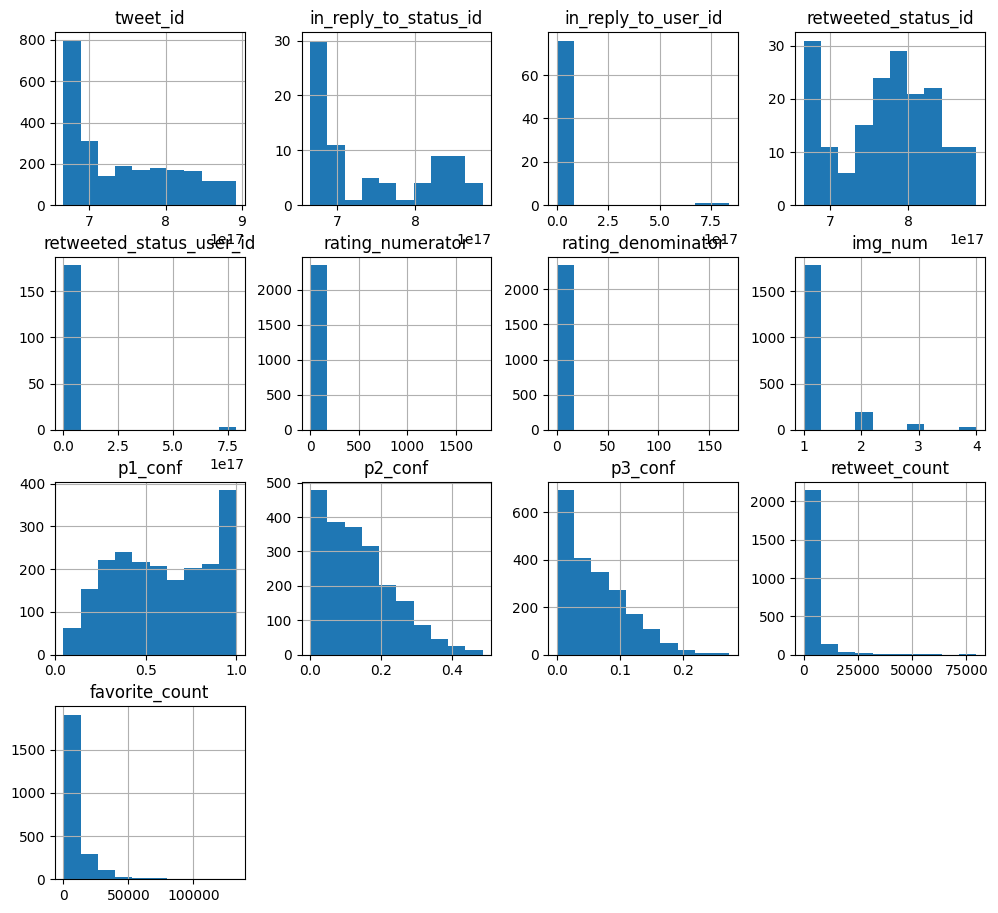

In [134]:
do_nothing()

In [136]:
#-insights section
print('After importing Libraries and our DataFrame(by pd), I started viewing the information and values of our DataFrame,')
print('I gathered the data in the tree colabs then cleaned each one alone to make change this tidy,dirty datas into a clean data ,usable, readable for the reader and the reviewer and useful one,')
print('then I started searching for missing and duplicated data(zero) and replacing or get rid of it to get usable data,')
print('I made visualizations for the dataframe to make its viewing easier in one function(do_nothing).')

After importing Libraries and our DataFrame(by pd), I started viewing the information and values of our DataFrame,
I gathered the data in the tree colabs then cleaned each one alone to make change this tidy,dirty datas into a clean data ,usable, readable for the reader and the reviewer and useful one,
then I started searching for missing and duplicated data(zero) and replacing or get rid of it to get usable data,
I made visualizations for the dataframe to make its viewing easier in one function(do_nothing).
